In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=072790621f39f5884c49079425be61084dfc1762abebbc2fad04d1af8ec8fbe5
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
!wget -r -N -c -np https://physionet.org/files/ptb-xl/1.0.3/

Streaming output truncated to the last 5000 lines.
Length: 120000 (117K) [application/octet-stream]
Saving to: ‘physionet.org/files/ptb-xl/1.0.3/records500/21000/21588_hr.dat’

physionet.org/files 100%[===================>] 117.19K  --.-KB/s    in 0.1s    

2024-07-21 02:25:39 (871 KB/s) - ‘physionet.org/files/ptb-xl/1.0.3/records500/21000/21588_hr.dat’ saved [120000/120000]

--2024-07-21 02:25:39--  https://physionet.org/files/ptb-xl/1.0.3/records500/21000/21588_hr.hea
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 611 [text/plain]
Saving to: ‘physionet.org/files/ptb-xl/1.0.3/records500/21000/21588_hr.hea’

physionet.org/files 100%[===================>]     611  --.-KB/s    in 0s      

2024-07-21 02:25:40 (251 MB/s) - ‘physionet.org/files/ptb-xl/1.0.3/records500/21000/21588_hr.hea’ saved [611/611]

--2024-07-21 02:25:40--  https://physionet.org/files/ptb-xl/1.0.3/records500/21000/21589_hr.dat
Reusing existing connection to phy

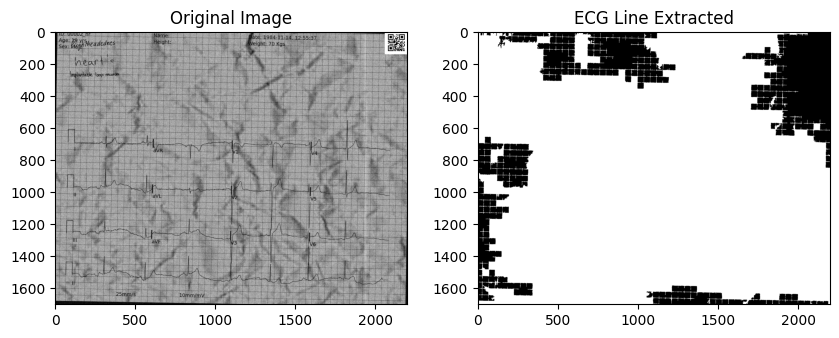

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/00002_hr-0.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply thresholding
_, binary = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY_INV)

# Apply morphological operations
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(binary, kernel, iterations=1)
eroded = cv2.erode(dilated, kernel, iterations=1)

# Find contours
contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty image to draw contours
output_image = np.zeros_like(image)

# Draw the largest contour
largest_contour = max(contours, key=cv2.contourArea)
cv2.drawContours(output_image, [largest_contour], -1, 255, thickness=cv2.FILLED)

# Display the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('ECG Line Extracted')
plt.imshow(output_image, cmap='gray')
plt.show()